In [1]:
import igraph as ig

In [2]:
!pwd

/Users/baott/SimSoM/experiments/10242023_v3.3_exps


# Degree distributions

### Old small net 
Network obtained by k-core + sampling edges

In [42]:
net = ig.Graph.Read_GML("data/follower_network.gml")
net.summary()

'IGRAPH D--- 1001 30030 -- \n+ attr: id (v), label (v), misinfo (v), party (v)'

In [10]:
net = ig.Graph.Read_GML("data/follower_network.gml")

In [11]:
net.summary()

'IGRAPH D--- 1040 188106 -- \n+ attr: id (v), label (v), misinfo (v), partisanship (v)'

In [14]:
deg = net.degree([node.index for node in net.vs])

In [15]:
import collections
import matplotlib.pyplot as plt

def plot_degree_dist(graph, mode='in', plot_fpath=None):
    # Plot degree distribution for a igraph network
    vertices = range(len(graph.vs)) #vertices index
    degs = graph.degree(vertices, mode=mode, loops=False)
    degs = dict(collections.Counter(degs))
    k_per_deg = dict(sorted(degs.items()))
    p_k = {deg: num/len(vertices) for deg,num in k_per_deg.items()}
    
    figure, ax = plt.subplots()
    ax.scatter(p_k.keys(),p_k.values())
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel('p_k')
    ax.set_xlabel('k')
    ax.set_title('Degree distribution (%s degree)' %mode)
    
    if plot_fpath is not None:
        figure.savefig(plot_fpath, dpi=300)
        plt.close(figure)
    else:
        figure.show()

/var/folders/gj/zfw5qy_n09d78gdzsfht4c7m0000gn/T/ipykernel_8642/2045424835.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


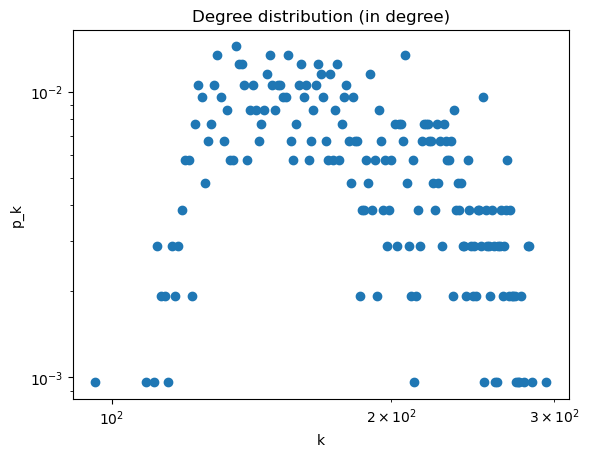

In [16]:
plot_degree_dist(net, mode='in', plot_fpath=None)

/var/folders/gj/zfw5qy_n09d78gdzsfht4c7m0000gn/T/ipykernel_8642/2045424835.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


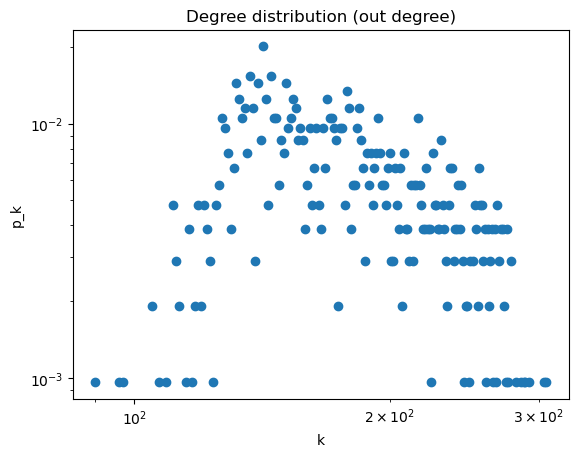

In [17]:
plot_degree_dist(net, mode='out', plot_fpath=None)

### Full network

/var/folders/gj/zfw5qy_n09d78gdzsfht4c7m0000gn/T/ipykernel_8642/2045424835.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


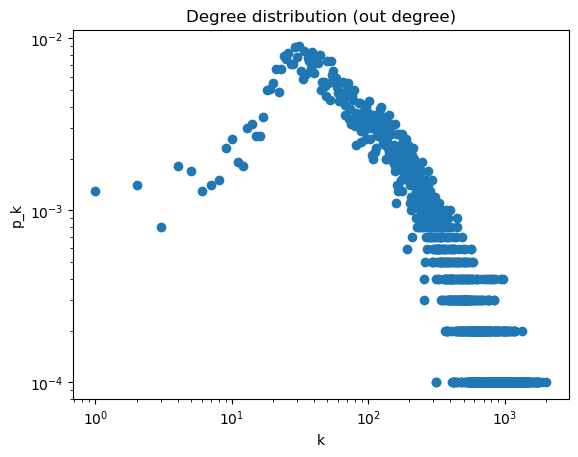

In [19]:
graph = ig.Graph.Read_GML("../../data/follower_network.gml")
plot_degree_dist(graph, mode='out', plot_fpath=None)

/var/folders/gj/zfw5qy_n09d78gdzsfht4c7m0000gn/T/ipykernel_8642/2045424835.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


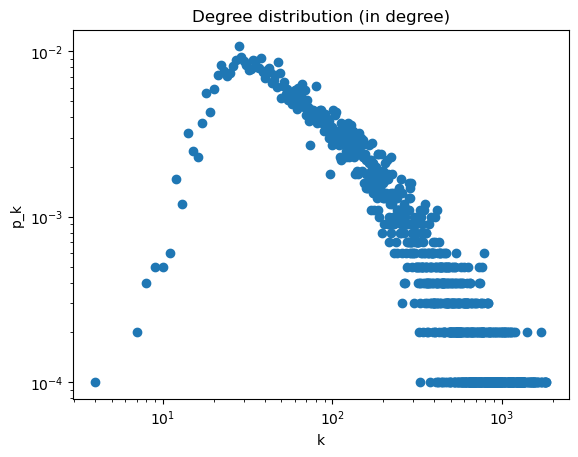

In [20]:
plot_degree_dist(graph, mode='in', plot_fpath=None)

In [24]:
import numpy as np
full_net_deg = graph.degree([node.index for node in graph.vs], mode='in')
print(f"Average number of friends (in-degree) in full net: {np.mean(full_net_deg)}")

Average number of friends (in-degree) in full net: 180.8712772336598


In [22]:
graph.summary()

'IGRAPH D--- 10006 1809798 -- \n+ attr: id (v), label (v), misinfo (v), party (v)'

So if gamma=0.01 (default), each bot have 100 followers, which is comparable to a human.

## Check number of node in each party

In [25]:
import json
import pandas as pd
import random
import os

path = "../../data/raw"
files = {
    # File has 3 columns: ID \t partisanship \t misinformation \n
    "user_info": "measures.tab",
    "adjlist": "anonymized-friends.json",
}

stats = pd.read_csv(os.path.join(path, files["user_info"]), sep="\t")
stats = stats.astype({"ID": str}).dropna(axis=0).drop_duplicates()

with open(os.path.join(path, files["adjlist"])) as fp:
    adjlist = json.load(fp)
# Convert all node names from int to str. Keys are already str
adjlist = {k: [str(n) for n in vlist] for k, vlist in adjlist.items()}

friends = stats[stats["ID"].isin(adjlist.keys())]
nodes = friends["ID"].values
print("Nodes that have partisanship info: ", len(nodes))
user_dict = friends.to_dict(orient="records")
user_dict = {
    user["ID"]: {
        "Partisanship": user["Partisanship"],
        "Misinformation": user["Misinformation"],
    }
    for user in user_dict
}

Nodes that have partisanship info:  15056


In [33]:
import collections 
party = [info["Partisanship"] for user,info in user_dict.items()]
binary_party = ["dem" if i>0 else "rep" for i in party]
print("Number of nodes in each party: ", dict(collections.Counter(binary_party)))

Number of nodes in each party:  {'rep': 8216, 'dem': 6840}


In [34]:
counts = dict(collections.Counter(binary_party))
k_nodes = min([i for i in counts.values()])

# Sample small network


In [35]:
rep = [user for user,info in user_dict.items() if info["Partisanship"]>0]
dem = [user for user,info in user_dict.items() if info["Partisanship"]<0]

In [37]:
sample_nodes = random.sample(rep, k_nodes) + random.sample(dem, k_nodes)
len(sample_nodes)

13680

In [41]:
a= [1,2]
b=[1]
a =set(a) - set(b)
a

{2}